# 0. Setup

## 0.1. Imports

In [ ]:
%load_ext autoreload
%autoreload 2

In [30]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import pandas as pd
import tensorflow as tf
import numpy as np
import uncertainty_libr as unc
import matplotlib.pyplot as plt
from scipy.special import erfinv
from math import sqrt, erf

from sklearn import preprocessing
from math import pi
from sklearn import metrics as me
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold


In [31]:
print(tf.__version__)

2.3.0


## 0.2. Data processing

In [32]:
dataset = pd.read_csv(r"Data/Uncertainty/Concrete_data.csv")

In [33]:
dataset

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [34]:
dataset.describe(include='all')

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [35]:
dataset.fillna(0)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [36]:
dataset.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [37]:
from sklearn.model_selection import train_test_split
train_dataset,test_dataset = train_test_split(dataset,test_size=0.2,random_state=42)

In [38]:
label_column = 'Concrete compressive strength(MPa, megapascals) '
input_column = train_dataset.columns.drop([label_column])

In [39]:
x_train = train_dataset[input_column].astype(np.float32)
y_train = train_dataset[label_column].astype(np.float32)

x_test = test_dataset[input_column].astype(np.float32)
y_test = test_dataset[label_column].astype(np.float32)

## 0.4 Certainty Losses

In [40]:
def DC_normal_loss(y_actual,y_pred):
    return unc.tf_DC(y_actual[:,0],y_pred[:,0],y_pred[:,1],'normal',RMSE_mult=1,CE_mult=1,mpiw_mult=0.125)

def DC_logistic_loss(y_actual,y_pred):
    return unc.tf_DC(y_actual[:,0],y_pred[:,0],y_pred[:,1],'logistic',RMSE_mult=1,CE_mult=1,mpiw_mult=0.05)

def DC_shifted_rayleigh_loss(y_actual,y_pred):
    return unc.tf_DC(y_actual[:,0],y_pred[:,0],y_pred[:,1],'shifted_rayleigh',RMSE_mult=1,CE_mult=1,mpiw_mult=0.1)

def QD_loss(y_actual,y_pred):
    return unc.tf_qd(y_actual[:,0],y_pred[:,0],y_pred[:,1],lambda_=0.40)

# 1. Preprocessing Setup

In [41]:
from sklearn.feature_selection import SelectKBest, f_regression

In [42]:
BATCH_SIZE=128

In [43]:
scale = True
if scale:
    x_scaler = preprocessing.MinMaxScaler((0, 1))
    y_scaler = preprocessing.MinMaxScaler((0, 1))

    processed_x_train = x_scaler.fit_transform(x_train)
    processed_y_train = y_scaler.fit_transform(y_train.values.reshape(-1, 1))

    processed_x_test = x_scaler.transform(x_test)
    processed_y_test = y_scaler.transform(y_test.values.reshape(-1, 1))

else:
    processed_x_train = x_train.values
    processed_y_train = y_train.values.reshape(-1, 1)

    processed_x_test = x_test.values
    processed_y_test = y_test.values.reshape(-1,1)

In [44]:
inp_dim = processed_x_test.shape[1]

In [45]:
train_dataset = tf.data.Dataset.from_tensor_slices(
    (
        processed_x_train,
        processed_y_train
    )
).batch(BATCH_SIZE)
test_dataset = tf.data.Dataset.from_tensor_slices(
    (
        processed_x_test,    
        processed_y_test
    )
).batch(BATCH_SIZE)

# 2. NN Setup

In [51]:
inp_dim = processed_x_test.shape[1]
LEARNING_RATE = 0.005
DECAY = 0.98
N_EPOCHS = 800
TOLERANCE = 0.005
early_stopping = False

In [52]:
def loss(model, x, y,distr):

    if distr=="shifted_rayleigh":
        return DC_shifted_rayleigh_loss(y,model(x))
    elif distr=="logistic":
        return DC_logistic_loss(y,model(x))
    elif distr=='normal':
        return DC_normal_loss(y,model(x))

    #return QD_loss(y,model(x))

def grad(model, inputs, targets,distr):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets,distr)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [53]:
def DC_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(inp_dim, activation='relu'),
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dense(2, activation='linear',bias_initializer=tf.keras.initializers.Constant(value=[1.0,0.0])) 
    ])
    
    return model

# 3. NN Training

In [54]:
Runs = 1
Ensembles = 5
alpha=0.1
distr="normal"

n_std_devs = sqrt(2.0)*erfinv(1-alpha)

In [55]:
RMSE_t = []
MAE_t = []
ME_t =[]
R2_t =[]
pinaw_t = []
pinaw_p_t = []
picp_t = []
adce_t = []
dce_t = []

eval_p = 0.95

import tqdm
optimizer = tf.keras.optimizers.Adam(lr=LEARNING_RATE, beta_1=DECAY)#0.0005)

for i in range(Runs):
    y_pred_all = []
    
    for j in range(Ensembles):
        print("Starting run "+str(i+1)+" of "+str(Runs)+" -- with ensemble "+str(j+1)+" of "+str(Ensembles))

        real_model=DC_model()

        # Keep results for plotting
        real_train_loss_results = []
        real_test_loss_results = []

        for epoch in range(N_EPOCHS):
            epoch_train_loss_avg = tf.keras.metrics.Mean()
            epoch_test_loss_avg = tf.keras.metrics.Mean()

            for x,y in train_dataset:
                # Optimize the model
                loss_value, grads = grad(real_model, x, y,distr)
                optimizer.apply_gradients(zip(grads, real_model.trainable_variables))
                # Track progress
                epoch_train_loss_avg(loss_value)  # Add current batch loss
                # End epoch

            for x,y in test_dataset:
                # Optimize the model
                loss_value = loss(real_model, x, y,distr)
                # Track progress
                epoch_test_loss_avg(loss_value)  # Add current batch loss
                # End epoch

            real_train_loss_results.append(epoch_train_loss_avg.result())
            real_test_loss_results.append(epoch_test_loss_avg.result())

            if epoch > 0:
                if early_stopping and (real_test_loss_results[epoch] - min_real_test_loss_results > TOLERANCE * min_real_test_loss_results):
                    print(f'Early stopping at epoch {epoch} using tolerance {TOLERANCE}.')
                    print("Epoch {:03d}: Train Loss: {:.3f}".format(epoch, epoch_train_loss_avg.result()))
                    print("Epoch {:03d}: Test Loss: {:.3f}".format(epoch, epoch_test_loss_avg.result()))
                    break
                else:
                    min_real_test_loss_results = tf.minimum(min_real_test_loss_results, epoch_test_loss_avg.result())
            else:
                min_real_test_loss_results = epoch_test_loss_avg.result()

            if epoch % 100 == 0:
                print("Epoch {:03d}: Train Loss: {:.3f}".format(epoch, epoch_train_loss_avg.result()))
                print("Epoch {:03d}: Test Loss: {:.3f}".format(epoch, epoch_test_loss_avg.result()))

        print("\n")
        pred_arr = processed_x_test
        test_arr = processed_y_test
        out=real_model.predict(pred_arr)

        y_pred_all.append(out)
        
        print("PICP: "+str(unc.PICP(out[:,0],out[:,1],test_arr[:,0])))
        print("NMIPW: "+str(unc.tf_PINAW_one_dim(test_arr[:,0],out[:,1],out[:,0]).numpy()))
        res,values,ece,pinaw_plot,dce_width,widths=unc.tf_ce_plot(test_arr,out[:,0],out[:,1],'normal')
        print("ACE: "+str(ece.numpy()))
        print("\n")

    y_pred_all = tf.convert_to_tensor(y_pred_all,dtype=np.float32)

    upper = tf.reduce_mean(y_pred_all[:,:,0],axis=0)+n_std_devs*tf.math.reduce_std(y_pred_all[:,:,0],axis=0)/tf.math.sqrt(float(y_pred_all.shape[0]))
    lower = tf.reduce_mean(y_pred_all[:,:,1],axis=0)-n_std_devs*tf.math.reduce_std(y_pred_all[:,:,1],axis=0)/tf.math.sqrt(float(y_pred_all.shape[0]))

    up_temp = tf.math.maximum(upper,lower)
    lower = tf.math.minimum(upper,lower)
    upper=up_temp
    
    distr = 'normal'

    sigm = unc.tf_calculate_sigma(upper,lower,distr)
    Y_pred,diff=unc.tf_calculate_mean(upper,lower,sigm,distr)
    dce = 2*np.mean(res-values)
    
    if distr =="logistic":
        p_low = (1-eval_p)/2
        p_up = (1+eval_p)/2
        upper_p=Y_pred+sigm*np.log(p_up/(1-p_up))
        lower_p=Y_pred+sigm*np.log(p_low/(1-p_low))
        
    elif distr =="shifted_rayleigh":
        p_low = (1-eval_p)/2
        p_up = (1+eval_p)/2
        upper_p=Y_pred-sigm+sqrt(-2*np.log(1-p_up))*sigm
        lower_p=Y_pred-sigm+sqrt(-2*np.log(1-p_low))*sigm
        
    elif distr =="normal":
        upper_p=Y_pred+sigm*sqrt(2)*erfinv(eval_p)
        lower_p=Y_pred-sigm*sqrt(2)*erfinv(eval_p)
    
    
    pinaw = unc.tf_PINAW_one_dim(test_arr[:,0],upper_p,lower_p).numpy()
    sigm = unc.tf_calculate_sigma(upper,lower,distr)
    Y_pred,diff=unc.tf_calculate_mean(upper,lower,sigm,distr)
    res,values,adce,pinaw_plot,dce_width,widths=unc.tf_ce_plot(test_arr,upper,lower,distr)
    pinaw_p = pinaw_plot[np.where(res.numpy()>=eval_p)[0][0]].numpy()
    dce = 2*np.mean(res-values)
    hard_picp = unc.PICP(upper_p,lower_p,test_arr[:,0])
    R2_total,RMSE_total,MAE_total,ME_total = unc.scores_calc_print(y_scaler.inverse_transform(Y_pred.numpy().reshape(-1,1)),y_scaler.inverse_transform(test_arr),False)


    RMSE_t = np.append(RMSE_t,RMSE_total)
    MAE_t = np.append(MAE_t,MAE_total)
    ME_t =np.append(ME_t,ME_total)
    R2_t =np.append(R2_t,R2_total)
    pinaw_t = np.append(pinaw_t,pinaw)
    pinaw_p_t = np.append(pinaw_p_t,pinaw_p)
    picp_t = np.append(picp_t,hard_picp)
    adce_t = np.append(adce_t,adce)
    dce_t = np.append(dce_t,dce)

Starting run 1 of 1 -- with ensemble 1 of 5
Epoch 000: Train Loss: 0.380
Epoch 000: Test Loss: 0.323
Epoch 100: Train Loss: 0.094
Epoch 100: Test Loss: 0.098


PICP: 0.7572815533980582
NMIPW: 0.17390765
ACE: 0.1735454


Starting run 1 of 1 -- with ensemble 2 of 5
Epoch 000: Train Loss: 0.295
Epoch 000: Test Loss: 0.281
Epoch 100: Train Loss: 0.096
Epoch 100: Test Loss: 0.110


PICP: 0.7718446601941747
NMIPW: 0.18499333
ACE: 0.16924216


Starting run 1 of 1 -- with ensemble 3 of 5
Epoch 000: Train Loss: 0.299
Epoch 000: Test Loss: 0.278
Epoch 100: Train Loss: 0.091
Epoch 100: Test Loss: 0.096


PICP: 0.8009708737864077
NMIPW: 0.16389196
ACE: 0.14245087


Starting run 1 of 1 -- with ensemble 4 of 5
Epoch 000: Train Loss: 0.377
Epoch 000: Test Loss: 0.337
Epoch 100: Train Loss: 0.101
Epoch 100: Test Loss: 0.105


PICP: 0.7864077669902912
NMIPW: 0.18007882
ACE: 0.11730577


Starting run 1 of 1 -- with ensemble 5 of 5
Epoch 000: Train Loss: 0.324
Epoch 000: Test Loss: 0.285
Epoch 100: Train

In [56]:
print(10*"-"+"RESULTS of "+str(Runs)+" runs"+10*"-")
print(f"RMSE: {np.mean(RMSE_t):.3f} +/- ({np.std(RMSE_t)/np.sqrt(Runs):.3f})")
print(f"MAE: {np.mean(MAE_t):.3f} +/- ({np.std(MAE_t)/np.sqrt(Runs):.3f})")
print(f"ME: {np.mean(ME_t):.3f} +/- ({np.std(ME_t)/np.sqrt(Runs):.3f})")
print(f"R2: {np.mean(R2_t):.3f} +/- ({np.std(R2_t)/np.sqrt(Runs):.3f})")
print(f"NMPIW: {np.mean(pinaw_t):.3f} +/- ({np.std(pinaw_t)/np.sqrt(Runs):.3f})")
print(f"NMPIW_p: {np.mean(pinaw_p_t):.3f} +/- ({np.std(pinaw_p_t)/np.sqrt(Runs):.3f})")
print(f"PICP: {np.mean(picp_t):.3f} +/- ({np.std(picp_t)/np.sqrt(Runs):.3f})")
print(f"ADCE: {np.mean(adce_t):.3f} +/- ({np.std(adce_t)/np.sqrt(Runs):.3f})")
print(f"DCE: {np.mean(dce_t):.3f} +/- ({np.std(dce_t)/np.sqrt(Runs):.3f})")

----------RESULTS of 1 runs----------
RMSE: 5.506 +/- (0.000)
MAE: 4.164 +/- (0.000)
ME: -1.225 +/- (0.000)
R2: 0.855 +/- (0.000)
NMPIW: 0.285 +/- (0.000)
NMPIW_p: 0.279 +/- (0.000)
PICP: 0.961 +/- (0.000)
ADCE: 0.037 +/- (0.000)
DCE: 0.034 +/- (0.000)


# 4. NN Evaluation

In [57]:
res,values,adce,pinaw_plot,dce_width,widths=unc.tf_ce_plot(test_arr,upper,lower,distr)

--
NN ACE: 0.036921024


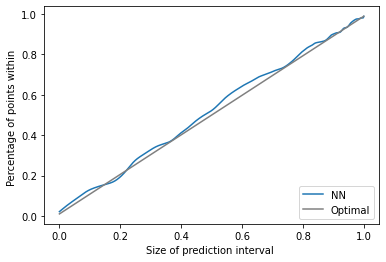

In [58]:
plt.figure(figsize=(6,4))
ax = plt.gca()
print("--")

print("NN ACE: "+str(adce.numpy()))

plt.plot(np.arange(0,1.0,1.0/len(values)),res,label='NN')
plt.plot(np.arange(0,1.0,1.0/len(values)),values,label='Optimal',color='gray')

plt.xlabel('Size of prediction interval ')
plt.ylabel('Percentage of points within ')
    
plt.legend(loc='lower right')
plt.show() 

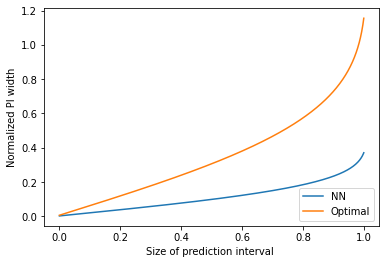

In [63]:
plt.figure(figsize=(6,4))
ax = plt.gca()

plt.plot(np.arange(0,1.0,1.0/len(values)),pinaw_plot,label='NN')
plt.plot(np.arange(0,1.0,1.0/len(values)),widths,label='Optimal')

plt.xlabel('Size of prediction interval ')
plt.ylabel('Normalized PI width')
    
plt.legend(loc='lower right')
plt.show() 

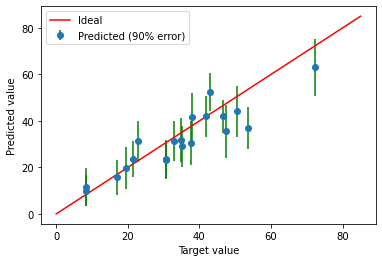

In [64]:
start = 0
end = 20
plt.errorbar(processed_y_test[start:end]/y_scaler.scale_,Y_pred[start:end]/y_scaler.scale_,yerr=np.array([Y_pred-lower,upper-Y_pred])[:,start:end]/y_scaler.scale_, fmt='o',ecolor='green',label='Predicted (90% error)')
plt.plot(np.arange(0,90,5),np.arange(0,90,5),color='red',label='Ideal')
plt.xlabel("Target value")
plt.ylabel("Predicted value")
plt.legend()

In [61]:
print(f'number of parameters in the model {real_model.count_params()}')

number of parameters in the model 624
